# Plotting the mutations density through the chromosomes

This notebook shows how to plot mutation density per chromosome alongside marks for centromeres and chromosome boundaries.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

We want to plot the distribution of the mutations along the chromosomes, so, we first read the positions of the mutations (read from a random sample of 100,000 mutations)

In [2]:
from collections import defaultdict
from ICGC_data_parser import SSM_Reader

distribution = defaultdict(list)

for record in SSM_Reader(filename='data/ssm_sample.vcf'):
    # Associate CHROMOSOME -> [MUTATION POSITIONS]
    distribution[record.CHROM].append(record.POS)

We want to add information of the positions of the centromeric regions and the chromosome boundaries. We read this from the table `data/chromosome-data.tsv`

In [3]:
from collections import namedtuple

# Create a custom class whose objects 
# hold information of a chromosome
Chromosome = namedtuple('Chromosome', ['length', 
                                       'centromere_start', 
                                       'centromere_end'])

In [4]:
import pandas as pd

# Open the file with the information of the centromeric regions
all_data = pd.read_table('data/chromosome-data.tsv',
                         delimiter='\t')
# Filter for human data
human_data = all_data[ all_data['species'] == 'Homo sapiens' ]

chromosomes = {}
for _, record in human_data.iterrows():
    chrom = record['chromosome']
    length = record['chromosome length (bp)']
    c_start = record['centromeric region start']
    c_end = record['centromeric region end']
    
    chromosomes[chrom] = Chromosome(length, c_start, c_end)

To ensure the chromosomes are plotted in the correct order, we provide a list that defines that order

In [5]:
chrom_names = [str(i+1) for i in range(22)] + ['X', 'Y', 'MT']

Finally, we can plot the mutations

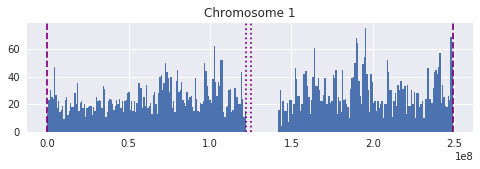

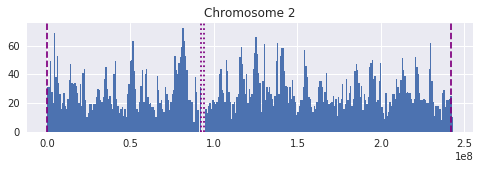

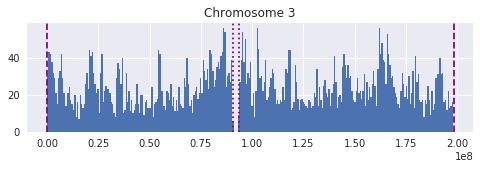

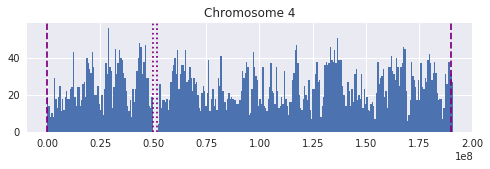

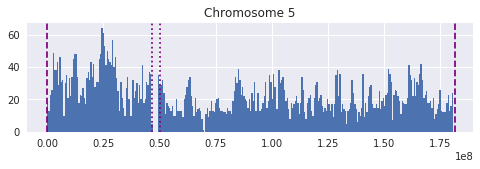

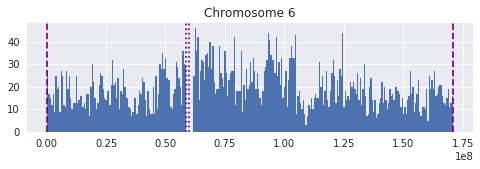

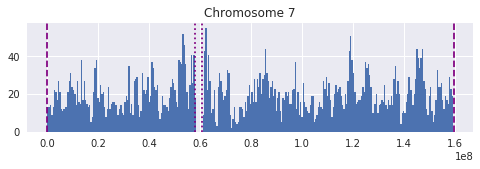

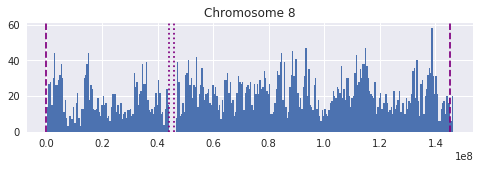

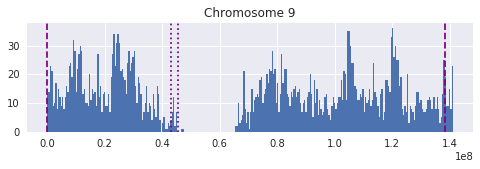

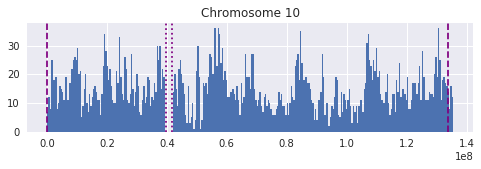

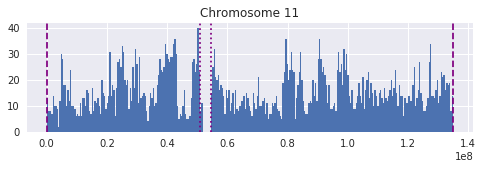

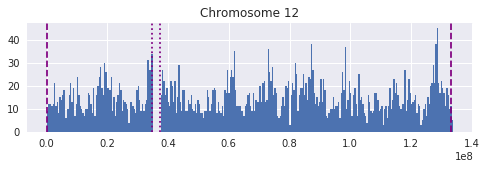

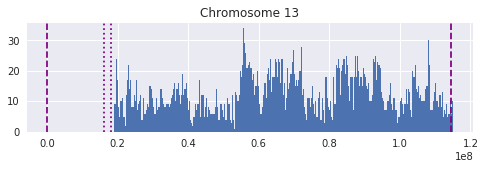

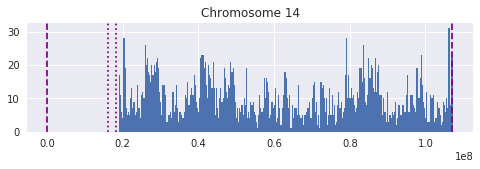

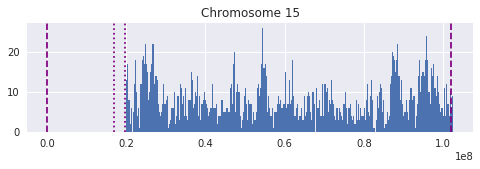

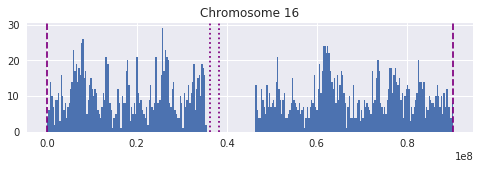

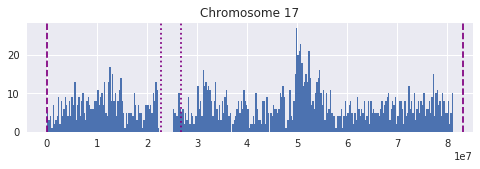

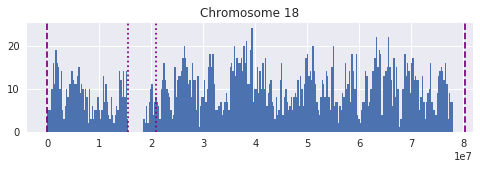

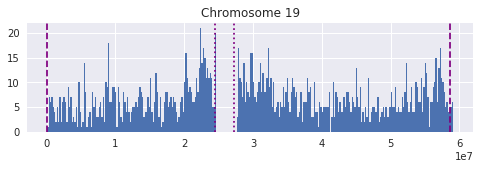

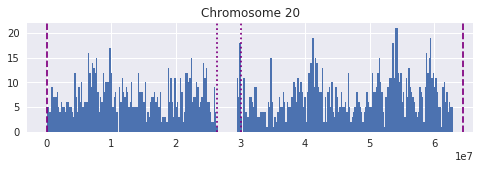

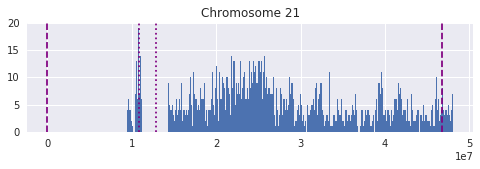

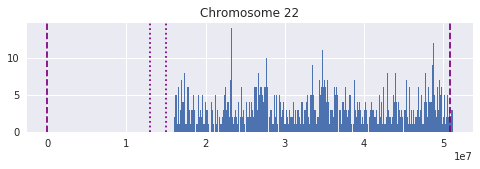

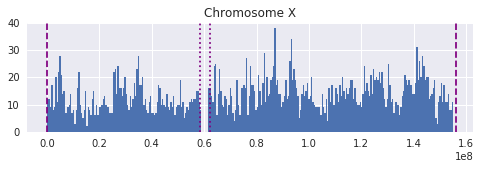

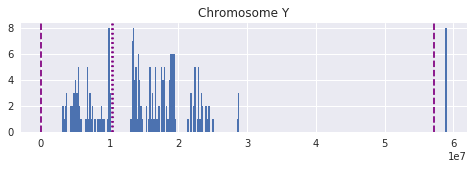

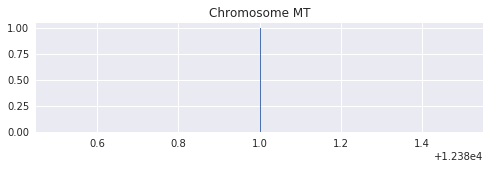

In [6]:
for chrom in chrom_names:
    fig, ax = plt.subplots(figsize=(8, 2))
    
    # Main plot
    ax.hist(distribution[chrom], bins=300)
    ax.set(title=f'Chromosome {chrom}')
    
    if chrom in chromosomes:
        # Fetch data on chromosome 
        # length and centromere positions
        chrom_data = chromosomes[chrom]
        
        # Chromosome boundaries
        ax.axvline(chrom_data.length, ls='--', color='purple')
        ax.axvline(0, ls='--', color='purple')

        # Chromosome centromeres
        ax.axvline(chrom_data.centromere_end, ls=':', color='purple')
        ax.axvline(chrom_data.centromere_start, ls=':', color='purple')
    
    plt.show()

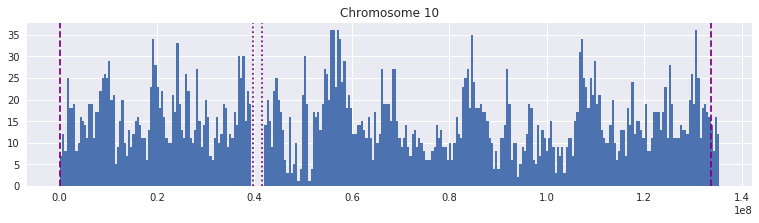

In [19]:
chrom = '10'

fig, ax = plt.subplots(figsize=(13, 3))
    
# Main plot
ax.hist(distribution[chrom], bins=300)
ax.set(title=f'Chromosome {chrom}')
    
if chrom in chromosomes:
    # Fetch data on chromosome 
    # length and centromere positions
    chrom_data = chromosomes[chrom]
        
    # Chromosome boundaries
    ax.axvline(chrom_data.length, ls='--', color='purple')
    ax.axvline(0, ls='--', color='purple')

    # Chromosome centromeres
    ax.axvline(chrom_data.centromere_end, ls=':', color='purple')
    ax.axvline(chrom_data.centromere_start, ls=':', color='purple')
    
plt.savefig('chromosome-mutations.png')
plt.show()